# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [2]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [2]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

FileNotFoundError: [Errno 2] File b'/home/ilias/Repositories/Master Thesis/experiments/unseen_person/output/training.log' does not exist: b'/home/ilias/Repositories/Master Thesis/experiments/unseen_person/output/training.log'

### Training accuracy

In [ ]:
training_acc_columns = [x for x in list(training_df.columns) if "acc" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Sequence LSTM model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.ylim([0.5,1.0])

plt.show()

### Training loss

In [ ]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.0,1.0])

plt.show()

## Evaluation

In [3]:
with open(os.path.join(root, "output", "general_eval.json")) as fp:
    df1 = pandas.read_json(fp).T
with open(os.path.join(root, "output", "transfer_eval.json")) as fp:
    df2 = pandas.read_json(fp).T

Each point in the boxplot is the accuracy for one subject

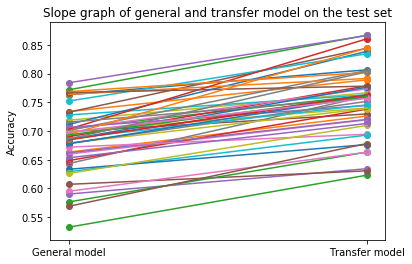

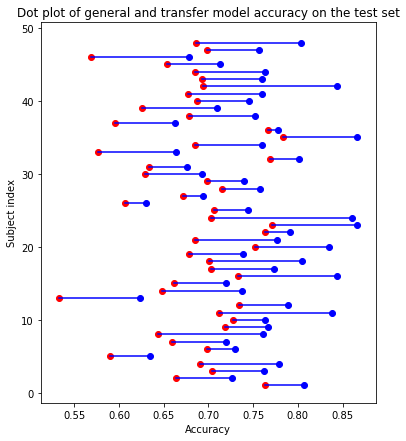

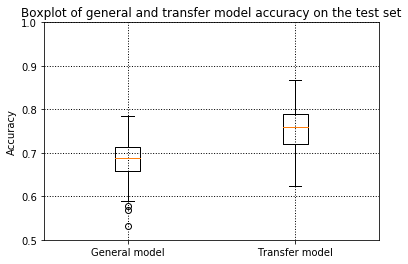

WilcoxonResult(statistic=1176.0, pvalue=8.155050215481112e-10)


In [24]:
from scipy import stats

plt.figure()
for general, transfer in zip(df1.T.values[1], df2.T.values[1]):
    plt.plot([1, 2], [general, transfer])
    plt.scatter([1, 2], [general, transfer])
plt.ylabel("Accuracy")
plt.title("Slope graph of general and transfer model on the test set")
plt.xticks([1, 2], ["General model", "Transfer model"])
plt.show()

plt.figure(figsize=(6,7))
i = 1
for general, transfer in zip(df1.T.values[1], df2.T.values[1]):
    plt.plot([general, transfer], [i, i], color='blue')
    plt.scatter([general], [i], color='red')
    plt.scatter([transfer], [i], color='blue')
    i += 1
plt.ylabel("Subject index")
plt.xlabel("Accuracy")
plt.title("Dot plot of general and transfer model accuracy on the test set")
plt.show()

plt.figure()
plt.grid(color='black', linestyle=':', linewidth=1)
plt.boxplot([df1[["acc"]].T.values[0], df2[["acc"]].T.values[0]])
plt.ylim([0.5,1])
plt.title("Boxplot of general and transfer model accuracy on the test set")
plt.xticks([1, 2], ["General model", "Transfer model"])
plt.ylabel("Accuracy")
plt.show()

print(stats.wilcoxon(df2.T.values[1], df1.T.values[1], alternative="greater"))